# 📊 **Data Mining Preliminary Project**

**Group Members**
- Nathanael Chris Abrigo
- Dwight Kenneth Cruz
- Joshua Kyle Kessel Entrata
- Edjin Jerney Payumo

### Setup

#### **Install Dependencies**
*Uncomment the following line to install the required packages*  

In [1]:
### Install the required packages 
# !pip install pandas numpy seaborn matplotlib plotly scikit-learn nbformat


#### **Importing Libraries**

In [2]:
### Importing Libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Setup for the notebook
pd.set_option('display.max_columns', None)
%matplotlib inline


## **Data Mining**

### **1️⃣ Data Import & Exploration**

In [3]:
# Loading the 2023 FIES Dataset Volume 2
fies_23 = pd.read_csv('../data/raw/FIES PUF 2023 Volume2 Household Summary.csv')

In [4]:
fies_23.head(10)

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.5,119000,0,119000,0,461000,10000,0,0,0,0,0,4760,310.0,0,0,0,0,0,0,0,0,0,0,0,0,18830.0,57120.0,46820.0,2540.0,1734.0,2410.0,8000.0,1835.0,2244.0,0.0,2250.0,0.0,0.0,1950.0,1820.0,0.0,0.0,0.0,0.0,0,0,147553.0,14000.0,161553.0,510,36840,0,12000,0,12000,5585,1410,7864,3060,0,0,0,8420,0,0,3700,0,0,67389.0,607070.0,228942.0,228942.0,0,607070.0,2,88.543663,229.392223,2,242828.000000,10,10,10,10,10,1
1,1,28,2,2800,6.0,154400,0,154400,0,142000,43000,6000,0,0,0,0,2790,1790.0,0,0,0,0,0,0,0,44000,0,0,44000,0,36323.0,50206.0,43405.0,12500.0,2340.0,4710.0,12115.0,1230.0,2930.0,702.0,5025.0,0.0,960.0,5850.0,6162.0,0.0,1950.0,0.0,0.0,0,0,184458.0,12800.0,197258.0,2010,32080,0,18000,0,18000,12850,1610,19850,18800,75,50,11880,33164,30700,0,800,600,0,165819.0,411980.0,363077.0,363677.0,0,411980.0,2,88.543663,550.541336,2,68663.335938,5,5,2,2,5,1
2,1,28,3,2800,3.5,683452,0,683452,0,37000,28000,9000,0,0,0,0,940,41820.0,0,0,0,0,0,0,0,0,0,0,0,0,27770.0,54160.0,36440.0,11955.0,2364.0,5360.0,13805.0,1470.0,2580.0,0.0,1860.0,0.0,0.0,3900.0,3120.0,0.0,0.0,0.0,0.0,0,0,164784.0,11500.0,176284.0,2440,52860,0,18000,0,18000,12810,2910,29620,12894,0,0,85909,14050,108000,1500,17200,42709,0,340193.0,818212.0,516477.0,559186.0,0,818212.0,2,88.543663,321.149113,2,233774.859375,10,10,10,10,10,1
3,1,28,4,2800,2.5,48200,0,48200,10000,55000,5000,9000,0,0,0,0,2360,24738.0,24240,0,0,0,62000,0,0,0,0,0,86240,0,18272.0,21220.0,20380.0,10490.0,1836.0,2780.0,8240.0,1060.0,1586.0,552.0,1910.0,0.0,0.0,2550.0,1820.0,0.0,0.0,0.0,0.0,0,0,92696.0,10000.0,102696.0,1950,40350,0,18000,0,18000,5418,5054,10560,7800,0,0,0,5690,0,0,920,0,0,77742.0,258538.0,180438.0,180438.0,0,258538.0,2,88.543663,229.392223,2,103415.203125,7,8,5,5,8,1
4,1,28,5,2800,3.0,400994,0,400994,0,108000,5000,0,0,0,0,0,220,850.0,17660,0,0,0,0,0,0,0,0,0,17660,0,27020.0,64250.0,45770.0,3320.0,1056.0,2020.0,7145.0,1150.0,2140.0,552.0,2130.0,0.0,0.0,3900.0,2730.0,0.0,0.0,0.0,0.0,0,0,163183.0,8000.0,171183.0,1700,62250,0,18000,0,18000,14920,2565,48960,25860,220,0,44760,13620,0,0,4400,46524,0,219255.0,550724.0,390438.0,436962.0,2000,552724.0,2,88.543663,275.270668,2,183574.671875,9,10,9,9,10,1
5,1,28,6,2800,4.0,0,0,0,0,180000,0,0,0,0,0,0,140,2530.0,0,0,0,0,80800,0,0,72000,0,0,152800,0,29402.0,45529.0,24450.0,9086.0,1870.0,2460.0,10265.0,3800.0,2687.0,552.0,2250.0,0.0,1886.0,4550.0,3640.0,0.0,0.0,0.0,0.0,0,0,142427.0,19800.0,162227.0,2090,65160,0,18000,0,18000,8886,4050,27730,13494,4250,500,6000,10630,2500,0,0,16200,0,145290.0,353470.0,307517.0,323717.0,0,353470.0,2,88.543663,367.027557,2,88367.500000,7,7,4,4,7,1
6,1,28,7,2800,3.5,0,0,0,0,181000,23000,9000,0,24000,0,0,280,40675.0,45600,0,0,0,0,0,0,0,0,0,45600,0,21707.0,37808.0,23000.0,16050.0,2394.0,3795.0,10635.0,2120.0,5247.0,0.0,1350.0,0.0,0.0,3250.0,3850.0,0.0,1124.0,0.0,0.0,0,0,131206.0,13800.0,145006.0,1550,44500,0,21000,0,21000,9416,32602,15760,7200,4000,0,0,9666,48000,0,0,0,0,173818.0,344555.0,318824.0,318824.0,3200,347755.0,2,88.543663,321.149113,2,98444.289063,7,7,5,5,7,1
7,1,28,8,2800,2.0,0,0,0,0,60000,14000,6000,0,0,0,0,800,3085.0,24850,0,0,0,0,0,106440,0,0,0,131290,0,18972.0,24270.0,26380.0,1416.0,942.0,1185.0,8105.0,1090.0,141

### **2️⃣ Identifying Data and Attributes**

In [5]:
# Displaying the shape of the dataset
fies_23.shape

(163268, 90)

In [6]:
# Displaying the columns of the dataset
fies_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [7]:
# Displaying the data types of the columns and the number of non-null values
fies_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

In [8]:
# Displaying the summary statistics of the dataset
fies_23.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,163268.000000,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,163268.000000,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,1.632680e+05,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000,163268.000000
mean,9.600209,45.721427,81634.500000,4574.490751,4.135504,1.495268e+05,2.872110e+04,1.782479e+05,1.678624e+03,2.422786e+04,1.625567e+04,2.087703e+03,261.068783,8.917411e+03,9.279524e+02,334.375260,3147.782842,6.229320e+03,1.349645e+04,2.298986e+03,4.626744e+03,387.405021,2.544389e+04,2.398009e+03,6.584374e+03,5.824782e+03,3.672963e+02,3.758046e+02,6.181191e+04,8.169978,27286.062891,16053.257366,14394.006695,6144.197778,1712.811002,4601.016959,7037.525935,2141.598779,4130.657394,711.642792,2217.816260,122.737804,438.272914,1900.274496,1187.452304,79.535181,1279.174387,1983.709162,67.003924,19.450805,1.171387,9.015887e+04,11548.751406,1.017076e+05,4.900740e+03,5.409333e+04,3.653566e+03,2.801967e+04,8.943057e+01,3.176266e+04,6.315285e+03,6.971786e+03,1.581311e+04,7888.639139,1.988345e+03,8.202996e+03,6376.147353,9065.431358,5.097815e+03,6275.710347,4.889744e+03,2.743421e+04,218.148829,1.414477e+05,3.321473e+05,2.431553e+05,2.705896e+05,1.010574e+04,3.422530e+05,573.167081,168.310355,691.456715,1.524383,9.530256e+04,5.193816,5.494518,5.564728,5.483561,5.490482,9.713183
std,5.143726,24.820490,47131.556212,2482.168879,1.966900,2.384600e+05,6.904034e+04,2.494863e+05,1.239273e+04,8.593570e+04,2.991219e+04,2.482738e+04,3388.956853,6.055216e+04,6.751070e+04,5839.103922,6381.121388,2.155790e+04,4.460068e+04,4.009795e+04,2.985207e+04,5000.560669,2.251064e+05,3.531579e+04,3.467995e+04,8.237168e+04,1.672914e+04,1.802239e+04,2.660405e+05,738.982873,12875.671564,13694.003058,10333.798670,6312.403759,1549.350682,4226.019431,5509.888624,2031.424024,6184.097005,1149.474516,2066.748378,518.245413,1170.879435,2127.917027,1353.817982,550.259214,2686.722445,4540.873882,489.885721,226.289097,68.121341,4.494110e+04,19540.102473,5.493516e+04,7.662093e+03,5.933142e+04,1.790243e+04,4.143742e+04,6.836886e+03,4.422733e+04,1.575241e+04,2.631806e+04,2.123939e+04,8947.522999,9.025928e+03,2.421281e+04,17194.193854,10490.738724,3.698498e+04,13899

### **3️⃣ Determining the Type of Dataset**


In [ ]:
# help

### **4️⃣ Data Quality Assessment**

#### Check for missing values and duplicates

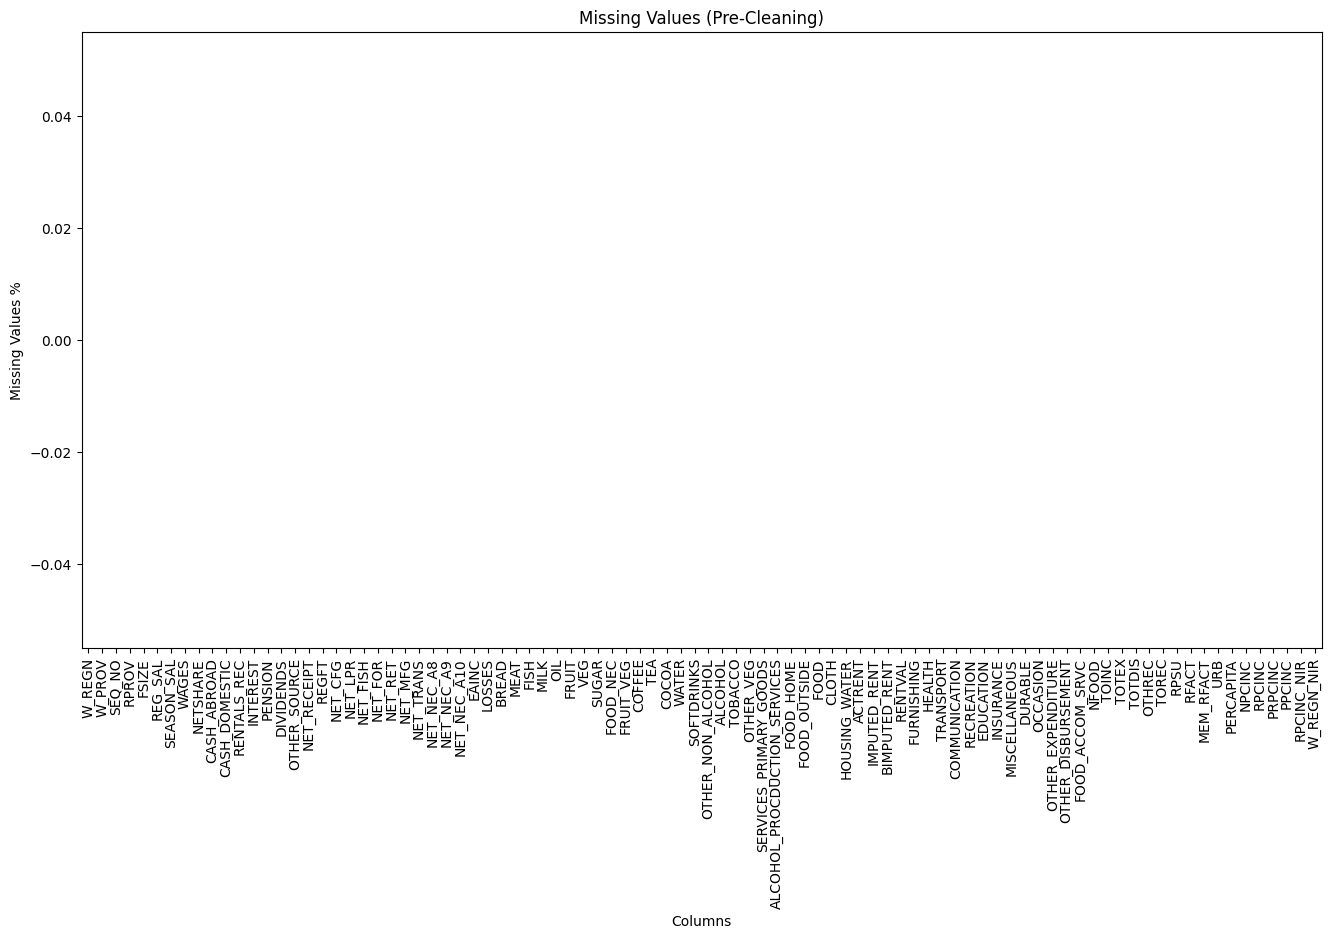

In [9]:
### Displaying the missing values in the dataset

# Calculating the Missing Values % contribution in DF
df_null = round(100*(fies_23.isnull().sum())/len(fies_23), 2)

# Plotting the df_null
plt.figure(figsize=(16,8))
sns.barplot(x=df_null.index, y=df_null.values, alpha=0.8)
plt.title('Missing Values (Pre-Cleaning)')
plt.ylabel('Missing Values %')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

In [10]:
# Identifying duplicate rows using `duplicated()` method
duplicate_rows = fies_23[fies_23.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


In [11]:
# Identifying duplicate rows by comparing total rows with unique rows
total_rows = fies_23.shape[0]
unique_rows = fies_23.drop_duplicates().shape[0]
duplicate_rows = total_rows - unique_rows

print(f"Total rows: {total_rows}")
print(f"Unique rows: {unique_rows}")
print(f"Duplicate rows: {duplicate_rows}")


Total rows: 163268
Unique rows: 163268
Duplicate rows: 0


In [12]:
cleaned_fies = fies_23.copy()

#### Outlier Handling

In [ ]:
### help

#### Verify Column Aggregations

In [13]:
def check_aggregation(
    dataframe: pd.DataFrame,
    components: list[str],
    aggregated_column: str,
    tolerance: float = 0.0
) -> tuple[pd.DataFrame, str]:
    
    # Validate inputs
    if tolerance < 0:
        raise ValueError("Tolerance must be non-negative")
        
    missing_columns = [col for col in [aggregated_column] + components 
                      if col not in dataframe.columns]
    if missing_columns:
        raise ValueError(f"Missing columns: {missing_columns}")

    # Select only relevant columns and convert to float64 in one operation
    temp_df = dataframe[components + [aggregated_column]].astype(np.float64)
    
    # Calculate sum and compare in a single chain
    mismatched_rows = temp_df[
        ~np.isclose(
            temp_df[aggregated_column],
            temp_df[components].sum(axis=1),
            atol=tolerance
        )
    ][[aggregated_column] + components]

    # Result string
    result = (f"The '{aggregated_column}' column matches its components "
             f"within ±{tolerance} tolerance.") if mismatched_rows.empty else \
            f"Found {len(mismatched_rows)} mismatched rows"

    return mismatched_rows, result

In [14]:
components = ['REG_SAL', 'SEASON_SAL']
aggregate_column = 'WAGES'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        Wages_components = components
        print(f"Validated components of {aggregate_column}: {Wages_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'WAGES' column matches its components within ±0.0 tolerance.
Validated components of WAGES: ['REG_SAL', 'SEASON_SAL']


In [15]:
components = [
    'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 
    'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 
    'NET_NEC_A9', 'NET_NEC_A10', 'LOSSES'
]
aggregate_column = 'EAINC'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        EAINC_components = components
        print(f"Validated components of {aggregate_column}: {EAINC_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'EAINC' column matches its components within ±0.0 tolerance.
Validated components of EAINC: ['NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'LOSSES']


In [16]:
components = [
    'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 
    'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT',
    'IMPUTED_RENT', 'EAINC'
]
aggregate_column = 'TOINC'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        TOINC_components = components
        print(f"Validated components of {aggregate_column}: {TOINC_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'TOINC' column matches its components within ±0.0 tolerance.
Validated components of TOINC: ['WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'IMPUTED_RENT', 'EAINC']


In [17]:
components = [
    'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC',
    'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL'
]
aggregate_column = 'FOOD_HOME'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        FOOD_HOME_components = components
        print(f"Validated components of {aggregate_column}: {FOOD_HOME_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'FOOD_HOME' column matches its components within ±0.0 tolerance.
Validated components of FOOD_HOME: ['BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL']


In [18]:
components = [
    'FOOD_HOME', 'FOOD_OUTSIDE'
]
aggregate_column = 'FOOD'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        FOOD_components = components
        print(f"Validated components of {aggregate_column}: {FOOD_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'FOOD' column matches its components within ±0.0 tolerance.
Validated components of FOOD: ['FOOD_HOME', 'FOOD_OUTSIDE']


In [19]:
components = [
    'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 
    'ALCOHOL_PROCDUCTION_SERVICES', 'CLOTH', 'HOUSING_WATER', 
    'FURNISHING', 'HEALTH','TRANSPORT',  'COMMUNICATION', 'RECREATION',
    'EDUCATION','INSURANCE','MISCELLANEOUS', 'DURABLE','OCCASION',
    'OTHER_EXPENDITURE', 'FOOD_ACCOM_SRVC',
]

aggregate_column = 'NFOOD'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        NFOOD_components = components
        print(f"Validated components of {aggregate_column}: {NFOOD_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'NFOOD' column matches its components within ±0.0 tolerance.
Validated components of NFOOD: ['ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'FOOD_ACCOM_SRVC']


In [20]:
components = [
    'FOOD', 'NFOOD'
]
aggregate_column = 'TOTEX'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        TOTEX_components = components
        print(f"Validated components of {aggregate_column}: {TOTEX_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'TOTEX' column matches its components within ±0.0 tolerance.
Validated components of TOTEX: ['FOOD', 'NFOOD']


In [21]:
components = [
    'TOTEX', 'OTHER_DISBURSEMENT'
]
aggregate_column = 'TOTDIS'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        TOTDIS_components = components
        print(f"Validated components of {aggregate_column}: {TOTDIS_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'TOTDIS' column matches its components within ±0.0 tolerance.
Validated components of TOTDIS: ['TOTEX', 'OTHER_DISBURSEMENT']


In [22]:
components = [
    'TOINC', 'OTHREC'
]
aggregate_column = 'TOREC'

try:
    mismatched_rows, result = check_aggregation(cleaned_fies, components, aggregate_column)
    print(result)
    
    if not mismatched_rows.empty:
        print("Mismatched rows:")
        print(mismatched_rows)
    else:
        TOREC_components = components
        print(f"Validated components of {aggregate_column}: {TOREC_components}")
except ValueError as e:
    print(f"Error: {e}")

The 'TOREC' column matches its components within ±0.0 tolerance.
Validated components of TOREC: ['TOINC', 'OTHREC']


In [23]:
# Get all column names of the cleaned_fies DataFrame
cleaned_fies_columns = cleaned_fies.columns.tolist()

# Print the list of column names
print("Complete columns in cleaned_fies:", cleaned_fies_columns)


Complete columns in cleaned_fies: ['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBURSEMENT', 'FOOD_ACCOM_SRVC', 'NFOOD', 'TOINC', 'TOTEX', 'TOTDIS', 'O

In [24]:
# Printing the component lists for each aggregated column
print("WAGES components:", Wages_components)
print("EAINC components:", EAINC_components)
print("TOINC components:", TOINC_components)
print("FOOD_HOME components:", FOOD_HOME_components)
print("FOOD components:", FOOD_components)
print("NFOOD components:", NFOOD_components)
print("TOTEX components:", TOTEX_components)
print("TOTDIS components:", TOTDIS_components)
print("TOREC components:", TOREC_components)

WAGES components: ['REG_SAL', 'SEASON_SAL']
EAINC components: ['NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'LOSSES']
TOINC components: ['WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'IMPUTED_RENT', 'EAINC']
FOOD_HOME components: ['BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL']
FOOD components: ['FOOD_HOME', 'FOOD_OUTSIDE']
NFOOD components: ['ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'FOOD_ACCOM_SRVC']
TOTEX components: ['FOOD', 'NFOOD']
TOTDIS components: ['TOTEX', 'OTHER_DI

In [25]:
# Function to extract names and parents from hierarchical data
def extract_hierarchy(data, parent="Root"):
    names = []
    parents = []
    for key, value in data.items():
        names.append(key)
        parents.append(parent)
        if isinstance(value, dict):
            child_names, child_parents = extract_hierarchy(value, key)
            names.extend(child_names)
            parents.extend(child_parents)
    return names, parents

# Extract names and parents from the dataset hierarchy
names, parents = extract_hierarchy({
    "W_REGN": None,
    "W_PROV": None,
    "SEQ_NO": None,
    "RPROV": None,
    "FSIZE": None,
    "TOREC": {
        "TOINC": {
            "WAGES": {
                "REG_SAL": None,
                "SEASON_SAL": None
            },
            "NETSHARE": None,
            "CASH_ABROAD": None,
            "CASH_DOMESTIC": None,
            "RENTALS_REC": None,
            "INTEREST": None,
            "PENSION": None,
            "DIVIDENDS": None,
            "OTHER_SOURCE": None,
            "NET_RECEIPT": None,
            "REGFT": None,
            "IMPUTED_RENT": None,
            "EAINC": {
                "NET_CFG": None,
                "NET_LPR": None,
                "NET_FISH": None,
                "NET_FOR": None,
                "NET_RET": None,
                "NET_MFG": None,
                "NET_TRANS": None,
                "NET_NEC_A8": None,
                "NET_NEC_A9": None,
                "NET_NEC_A10": None,
                "LOSSES": None
            }
        },
        "OTHREC": None
    },
    "TOTDIS": {
        "TOTEX": {
            "FOOD": {
                "FOOD_HOME": {
                    "BREAD": None,
                    "MEAT": None,
                    "FISH": None,
                    "MILK": None,
                    "OIL": None,
                    "FRUIT": None,
                    "VEG": None,
                    "SUGAR": None,
                    "FOOD_NEC": None,
                    "FRUIT_VEG": None,
                    "COFFEE": None,
                    "TEA": None,
                    "COCOA": None,
                    "WATER": None,
                    "SOFTDRINKS": None,
                    "OTHER_NON_ALCOHOL": None
                },
                "FOOD_OUTSIDE": None
            },
            "NFOOD": {
                "ALCOHOL": None,
                "TOBACCO": None,
                "OTHER_VEG": None,
                "SERVICES_PRIMARY_GOODS": None,
                "ALCOHOL_PROCDUCTION_SERVICES": None,
                "CLOTH": None,
                "HOUSING_WATER": None,
                "FURNISHING": None,
                "HEALTH": None,
                "TRANSPORT": None,
                "COMMUNICATION": None,
                "RECREATION": None,
                "EDUCATION": None,
                "INSURANCE": None,
                "MISCELLANEOUS": None,
                "DURABLE": None,
                "OCCASION": None,
                "OTHER_EXPENDITURE": None,
                "FOOD_ACCOM_SRVC": None
            }
        },
        "OTHER_DISBURSEMENT": None
    },
    "RPSU": None,
    "RFACT": None,
    "MEM_RFACT": None,
    "URB": None,
    "PERCAPITA": None,
    "NPCINC": None,
    "RPCINC": None,
    "PRPCINC": None,
    "PPCINC": None,
    "RPCINC_NIR": None,
    "W_REGN_NIR": None
})



In [26]:
# Create the treemap visualization
fig = px.treemap(
    names=names,
    parents=parents,
    title="Hierarchy of Columns in FIES Dataset",
    color_discrete_sequence=["#636EFA", "#EF553B", "#00CC96", "#AB63FA"]

)
fig.update_traces(root_color="lightgrey")
fig.update_layout(
    width=1400,  # Set the width of the figure
    height=800,  # Set the height of the figure
    margin=dict(t=50, l=25, r=25, b=25)  # Adjust the margins if needed
)
fig.show()

In [37]:
# Print the list of column names
print("Complete columns in cleaned_fies:", cleaned_fies.columns.tolist())

# Printing the component lists for each aggregated column
print("WAGES components:", Wages_components)
print("EAINC components:", EAINC_components)
print("TOINC components:", TOINC_components)
print("FOOD_HOME components:", FOOD_HOME_components)
print("FOOD components:", FOOD_components)
print("NFOOD components:", NFOOD_components)
print("TOTEX components:", TOTEX_components)
print("TOTDIS components:", TOTDIS_components)
print("TOREC components:", TOREC_components)


Complete columns in cleaned_fies: ['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL', 'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10', 'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING', 'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 'OTHER_EXPENDITURE', 'OTHER_DISBURSEMENT', 'FOOD_ACCOM_SRVC', 'NFOOD', 'TOINC', 'TOTEX', 'TOTDIS', 'O

### **5️⃣ Quantitative Statistics**

In [38]:
def plot_correlation_heatmap(dataframe, aggregated_column, components, title):
    # Subset the dataframe
    subset = dataframe[[aggregated_column] + components]
    
    # Calculate the correlation matrix
    correlation_matrix = subset.corr()
    
    # Plot heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [39]:
def plot_grouped_bar_chart_average(dataframe, components, group_by_column, title):
    # Calculate average values for components grouped by the specified column
    averages = dataframe.groupby(group_by_column)[components].mean().reset_index()
    
    # Melt the dataframe for easier plotting
    melted = averages.melt(id_vars=[group_by_column], 
                           value_vars=components, 
                           var_name='Component', 
                           value_name='Average Value')
    
    # Plot the grouped bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=melted, x=group_by_column, y='Average Value', hue='Component', palette='viridis')
    plt.title(title)
    plt.ylabel('Average Value')
    plt.xlabel(group_by_column)
    plt.legend(title='Component')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


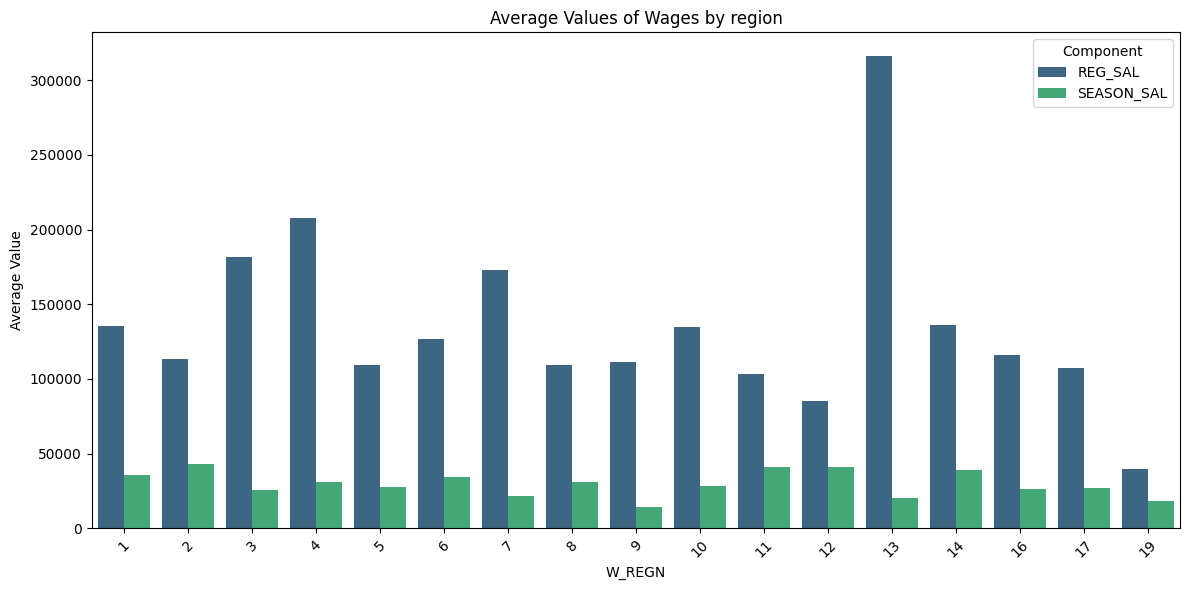

In [30]:
# Define the aggregated column and its components
aggregated_col = 'WAGES'
components_list = Wages_components
title = f'Average Values of Wages by region'

# Call the function
plot_grouped_bar_chart_average(cleaned_fies, components_list, group_by_column='W_REGN', title=title)


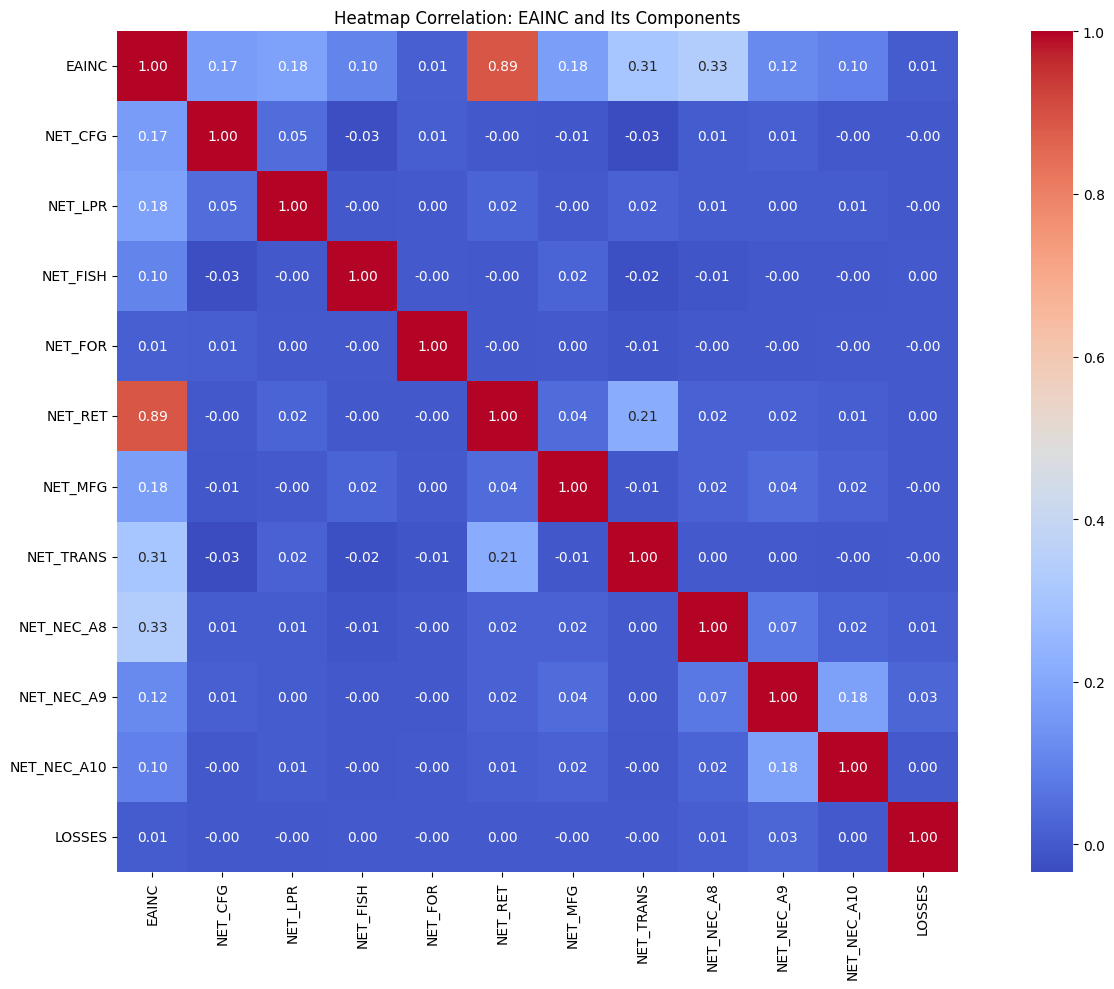

In [31]:
# Define the aggregated column and its components
aggregated_col = 'EAINC'
components_list = EAINC_components
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(cleaned_fies, aggregated_col, components_list, title=title)


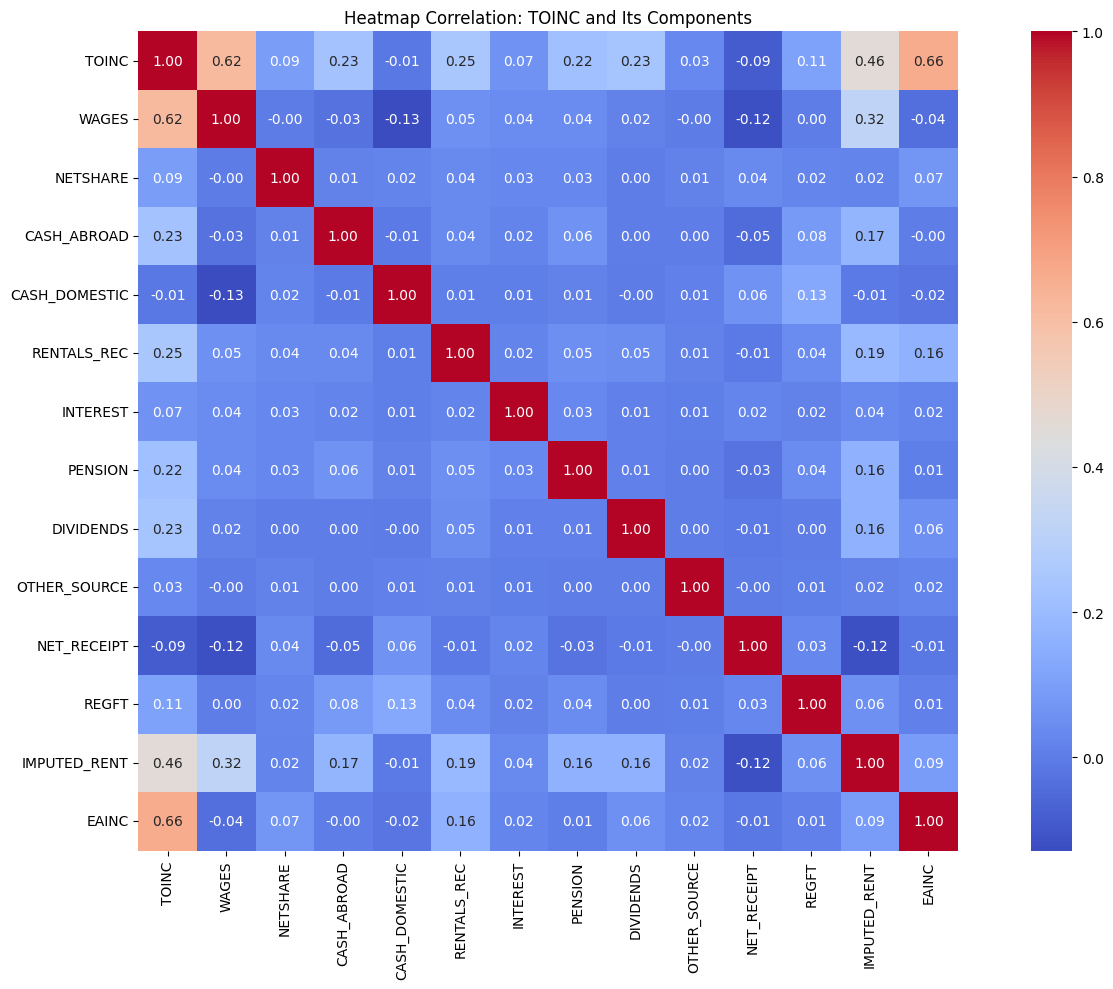

In [32]:
# Define the aggregated column and its components
aggregated_col = 'TOINC'
components_list = TOINC_components
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(cleaned_fies, aggregated_col, components_list, title=title)


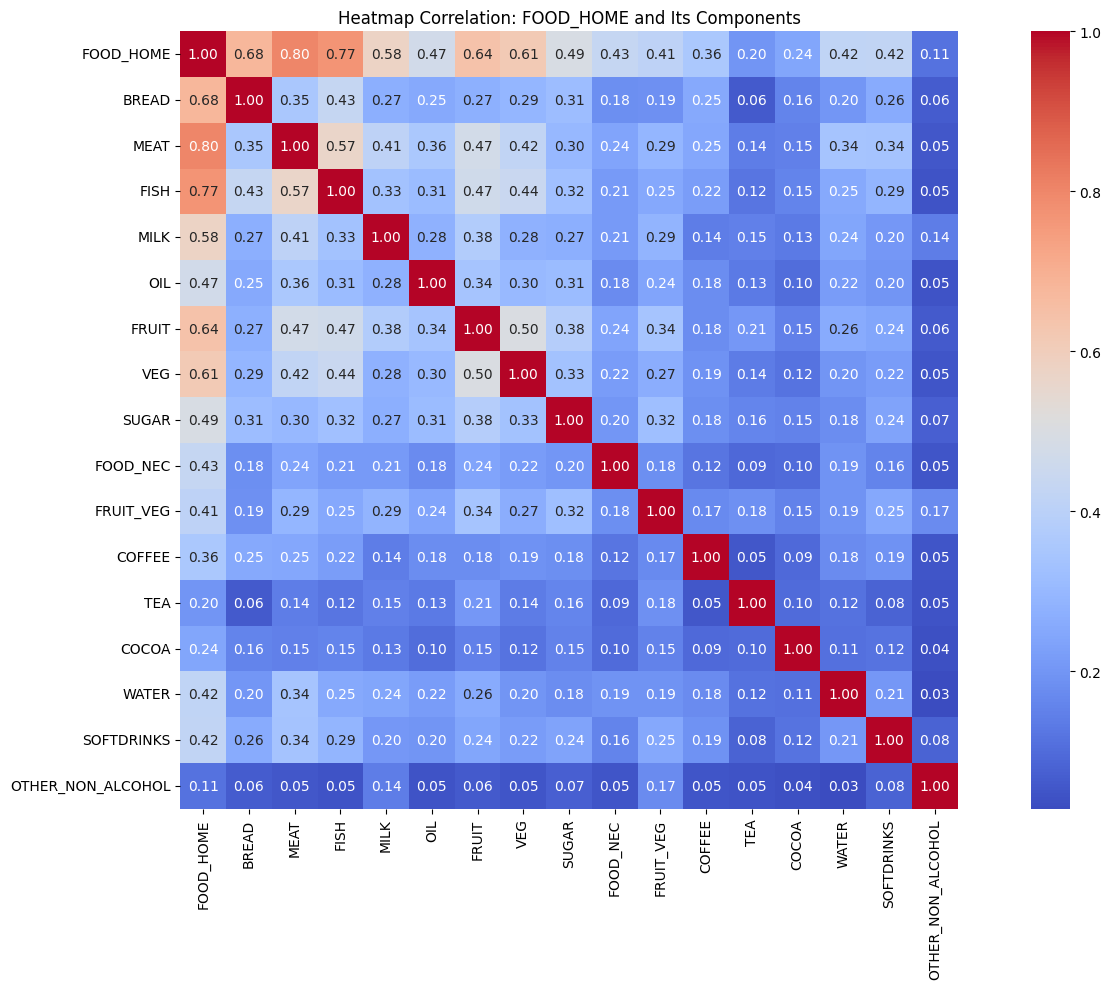

In [33]:
# Define the aggregated column and its components
aggregated_col = 'FOOD_HOME'
components_list = FOOD_HOME_components
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(cleaned_fies, aggregated_col, components_list, title=title)


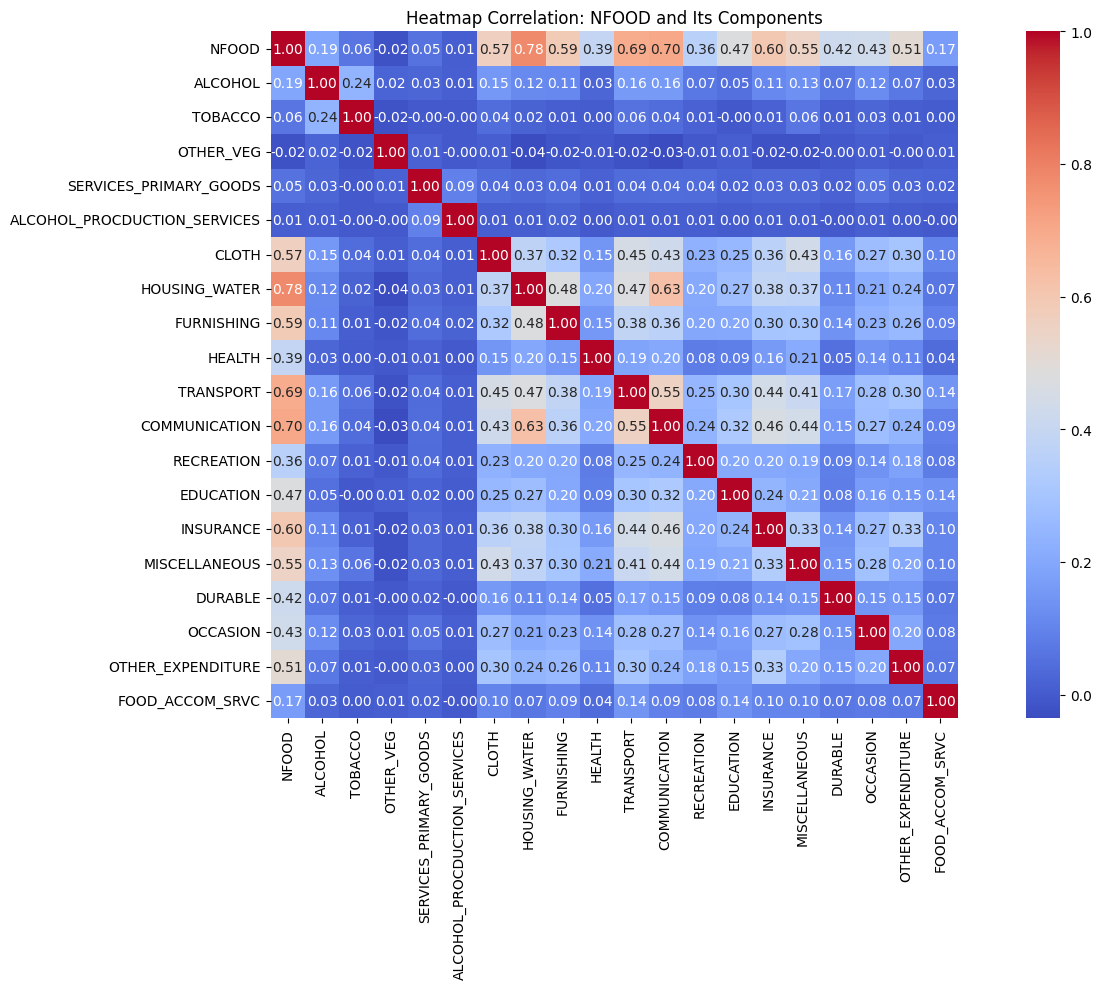

In [34]:
# Define the aggregated column and its components
aggregated_col = 'NFOOD'
components_list = NFOOD_components
title = f'Heatmap Correlation: {aggregated_col} and Its Components'

# Call the function
plot_correlation_heatmap(cleaned_fies, aggregated_col, components_list, title=title)


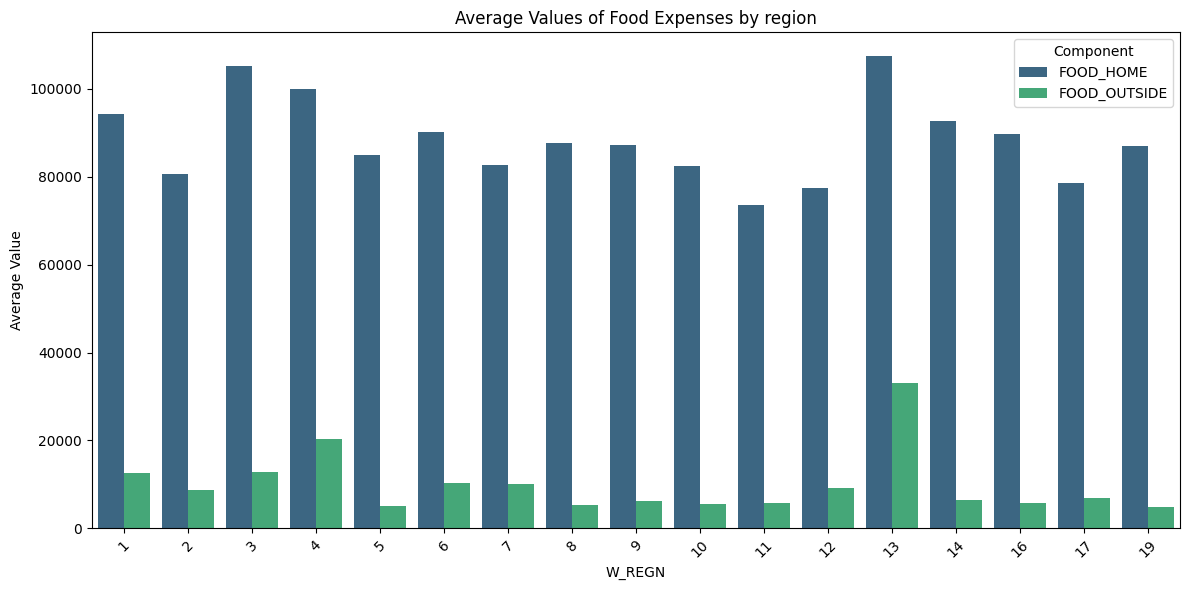

In [35]:
# Define the aggregated column and its components
aggregated_col = 'FOOD'
components_list = FOOD_components
title = f'Average Values of Food Expenses by region'

# Call the function
plot_grouped_bar_chart_average(cleaned_fies, components_list, group_by_column='W_REGN', title=title)


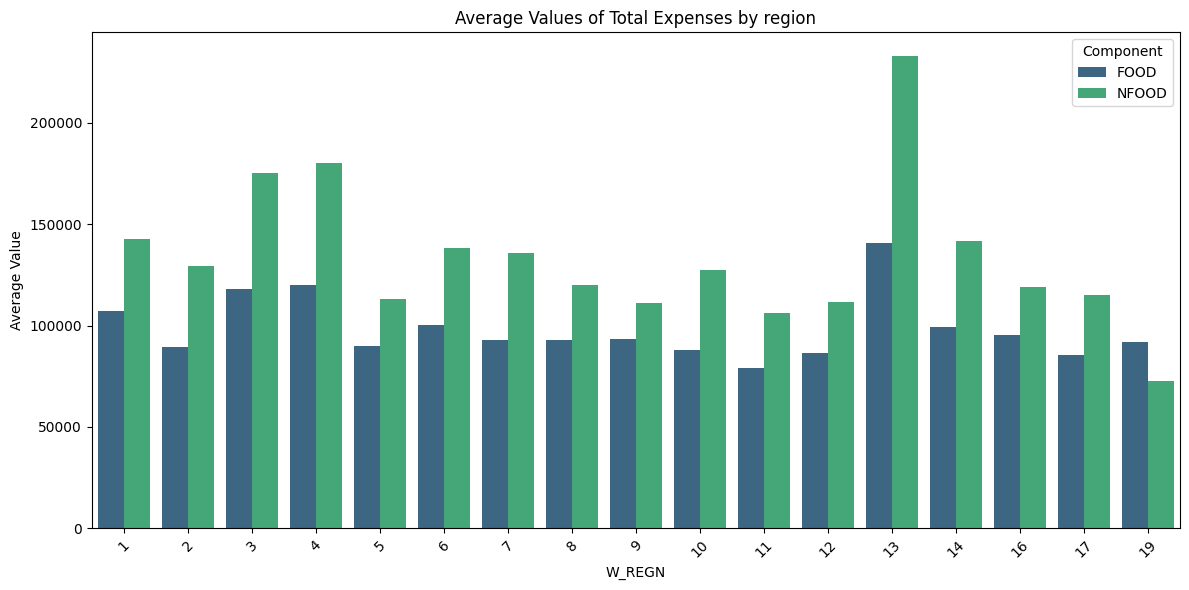

In [36]:
# Define the aggregated column and its components
aggregated_col = 'TOTEX'
components_list = TOTEX_components
title = f'Average Values of Total Expenses by region'

# Call the function
plot_grouped_bar_chart_average(cleaned_fies, components_list, group_by_column='W_REGN', title=title)


### **6️⃣ Application of Proximity (Distance Analysis)**

In [40]:
print("test")

test


### **7️⃣ Association Rule Mining**

In [41]:
print("test")

test


### **8️⃣ Insights and Recommendations**